## Business_Objective

 - This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 - The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
 - the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Required libraries

In [1]:
# Importing Libraries.

import pandas as pd                  # for data manipulation
import numpy as np                   # for numerical manipulation
import matplotlib.pyplot as plt      # for data visualisation
import chardet                       # for encoding detection of the file
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None   # To display all the columns
pd.options.display.max_rows = None      # To display all the rows

### Checking the encoding of the file. 

In [2]:
# Checking encoding of the loan.csv file.

# with open("loan.csv", 'rb') as file:
#     print(chardet.detect(file.read()))

OBSERVATION:
 - Chardet is 99 percent confidence about the file encoding which is 'utf-8'.
 - So, we will be using 'utf-8' encoding type as suggested.

### Reading the dataset loan 

In [3]:
# Reading the dataset

loan = pd.read_csv("loan.csv", encoding='utf-8')

### Data Inspection

In [4]:
# Checking the shape of the files.

print("The shape of loan: ", loan.shape)

The shape of loan:  (39717, 111)


OBSERVATION:
 - The loan files contains total 39717 rows and 111 columns.

In [5]:
# Checking the head of the loan

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# checking the tail of the loan

loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# Checking the sample of the loan

loan.sample(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
31439,495304,634398,7200,7200,7200.000000,36 months,7.14%,222.77,A,A3,National Institutes of Health,3 years,MORTGAGE,115731.0,Not Verified,Mar-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 03/16/10 > Accounts below ...,debt_consolidation,Pay Off High APR Credit Card Balance,208xx,MD,5.64,0,May-95,1,NaN,NaN,8,0,17631,41.40%,17,f,0.0,0.0,8006.334287,8006.33,7200.00,806.33,0.00,0.00,0.0000,Dec-12,1110.37,NaN,Dec-12,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
35848,428175,506399,10500,10500,7386.297359,36 months,12.53%,351.40,C,C1,astons marble and granite,3 years,RENT,51504.0,Not Verified,Jul-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"Hello, My name is Rolando Lerma Jr. and I am...",credit_card,Paying off high interest credit card,784xx,TX,23.49,0,Oct-01,1,NaN,NaN,12,0,18709,63.90%,19,f,0.0,0.0,12667.997070,8543.70,10499.99,2150.43,17.57,0.00,0.0000,Aug-12,361.85,NaN,Aug-12,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
18587,693291,884106,18000,18000,17893.192700,60 months,16.02%,437.92,D,D5,NaN,NaN,MORTGAGE,40000.0,Verified,Mar-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 03/05/11 > To be used for ...,small_business,business inventory,320xx,FL,9.36,0,Oct-84,1,63.0,NaN,8,0,1366,5.30%,26,f,0.0,0.0,21311.184850,21077.63,18000.00,3311.18,0.00,0.00,0.0000,Jul-12,47.23,NaN,Jul-12,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
12587,795438,1000177,23000,23000,22975.000000,36 months,11.99%,763.82,B,B5,Oakwood Healthcare,< 1 year,RENT,65000.0,Verified,Jun-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 06/23/11 > This is a debt ...,debt_consolidation,Pleasant Ridge Loan,480xx,MI,20.90,0,Sep-00,0,NaN,NaN,10,0,13492,93%,21,f,0.0,0.0,25394.482980,25366.87,23000

In [8]:
# checking the columns names present in loan dataset.

print("The columns in loan are: \n", loan.columns)       # column names of loan dataframe

The columns in loan are: 
 Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [9]:
#Considering only columns which are required for analysis
loan=loan[["id","annual_inc","pub_rec","pub_rec_bankruptcies","funded_amnt","installment","int_rate","term","grade"
      ,"emp_title","emp_length","home_ownership","verification_status","loan_status","purpose","dti","total_pymnt"
      ,"total_rec_prncp","recoveries","collection_recovery_fee"]]

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
id                         39717 non-null int64
annual_inc                 39717 non-null float64
pub_rec                    39717 non-null int64
pub_rec_bankruptcies       39020 non-null float64
funded_amnt                39717 non-null int64
installment                39717 non-null float64
int_rate                   39717 non-null object
term                       39717 non-null object
grade                      39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
verification_status        39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
dti                        39717 non-null float64
total_pymnt                39717 non-null float64
total_rec_prncp            39717 non-null float64
recove

OBSERVATION:
 - So, there are total of 111 columns present in the dataset.
 - Now, we try to find the missing values present in the dataset.

In [10]:
# Checking the percent of the missing values.

missing = round(100* (loan.isnull().sum() / len(loan['id'])))
print("The total no. of columns which contains 0 percent missing values: ",len(missing.loc[missing == 0]))
print("The total no. of columns which contains more than 30 percent missing values: ",len(missing.loc[missing >= 30]))

The total no. of columns which contains 0 percent missing values:  17
The total no. of columns which contains more than 30 percent missing values:  0


OBSERVATION:
 - We can see that there are 50 columns which doesnot contains any missing values.
 - Also, there are 61 columns which contains the missing values.
 - We can see that there are 58 columns which contains more than 30 percent missing values.
 - The columns contains 100 percent missing values are not required for further analysis, so we will remove or drop the columns.

In [11]:
# Let's store the columns which contains more than 30 percent missing values in a variable.

column_missing = list(missing[missing >= 30].index)
column_missing

[]

OBSERVATION:
 - So, we will drop all the columns present in columns_missing_values from loan dataframe.

In [12]:
# Let's drop the columns which is present in column_missing_values.

loan = loan.drop(column_missing, axis = 1)
loan.shape

(39717, 20)

OBSERVATION:
 - So we have remove all the columns which contain more than 50 percent of the missing values.

In [13]:
# Again let's check the percentage of missing values.

missing2 = round(100* (loan.isnull().sum() / len(loan['id'])), 2)
missing2[missing2 > 0.00]

pub_rec_bankruptcies    1.75
emp_title               6.19
emp_length              2.71
dtype: float64

OBSERVATION:
 - So we can see that there are some columns which contain missing values.
 - So we drop these rows which contain the missing values as we don't want to add noise in the data.
 - we can see that column desc contains more than 20 percent of missing values. So we will drop the column.

In [14]:
# let's check the rows contains the missing values and store in the variable.

rows_missing = list(missing2[missing2 > 0.00].index)
rows_missing

['pub_rec_bankruptcies', 'emp_title', 'emp_length']

In [15]:
# let's drop the rows which has more than 1 percent of missing values.

loan = loan.dropna(subset=rows_missing, axis = 0)
print(loan.shape)

(36548, 20)


In [16]:
# let's check the missing values again

round(100* (loan.isnull().sum() / len(loan['id'])), 2)

id                         0.0
annual_inc                 0.0
pub_rec                    0.0
pub_rec_bankruptcies       0.0
funded_amnt                0.0
installment                0.0
int_rate                   0.0
term                       0.0
grade                      0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
verification_status        0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
total_pymnt                0.0
total_rec_prncp            0.0
recoveries                 0.0
collection_recovery_fee    0.0
dtype: float64

OBSERVATION:
 - The data is clean and it doesnot contain any missing values.
 - Now we will try to remove the columns which is not necessary to solve are business objective.

In [17]:
# let's check the unique values present in the remaining columns.

for i in loan.columns:
    print("Total no. of unique values in {} column are {} \n The uniques values are {}".format(i, len(loan[i].unique()), loan[i].unique()))
    print("---------------------- \n")

Total no. of unique values in id column are 36548 
 The uniques values are [1077430 1076863 1075358 ...  132892  119043  112496]
---------------------- 

Total no. of unique values in annual_inc column are 4935 
 The uniques values are [ 30000.    49200.    80000.   ...  11029.   100671.39  36153.  ]
---------------------- 

Total no. of unique values in pub_rec column are 5 
 The uniques values are [0 1 2 3 4]
---------------------- 

Total no. of unique values in pub_rec_bankruptcies column are 3 
 The uniques values are [0. 1. 2.]
---------------------- 

Total no. of unique values in funded_amnt column are 1025 
 The uniques values are [ 2500 10000  3000 ...   500   725   700]
---------------------- 

Total no. of unique values in installment column are 14406 
 The uniques values are [ 59.83 339.31  67.79 ... 155.52 507.46  99.44]
---------------------- 

Total no. of unique values in int_rate column are 334 
 The uniques values are ['15.27%' '13.49%' '12.69%' '7.90%' '15.96%' '18.

In [18]:
# let's check the structure of the loan dataset

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36548 entries, 1 to 39680
Data columns (total 20 columns):
id                         36548 non-null int64
annual_inc                 36548 non-null float64
pub_rec                    36548 non-null int64
pub_rec_bankruptcies       36548 non-null float64
funded_amnt                36548 non-null int64
installment                36548 non-null float64
int_rate                   36548 non-null object
term                       36548 non-null object
grade                      36548 non-null object
emp_title                  36548 non-null object
emp_length                 36548 non-null object
home_ownership             36548 non-null object
verification_status        36548 non-null object
loan_status                36548 non-null object
purpose                    36548 non-null object
dti                        36548 non-null float64
total_pymnt                36548 non-null float64
total_rec_prncp            36548 non-null float64
recove

OBSERVATION:
 - After the redundant columns from the loan dataset we are left with only 36431 rows and 31 columns for our further analysis

In [19]:
# again let's check the structure of the loan dataset after dropping the redundant columns.

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36548 entries, 1 to 39680
Data columns (total 20 columns):
id                         36548 non-null int64
annual_inc                 36548 non-null float64
pub_rec                    36548 non-null int64
pub_rec_bankruptcies       36548 non-null float64
funded_amnt                36548 non-null int64
installment                36548 non-null float64
int_rate                   36548 non-null object
term                       36548 non-null object
grade                      36548 non-null object
emp_title                  36548 non-null object
emp_length                 36548 non-null object
home_ownership             36548 non-null object
verification_status        36548 non-null object
loan_status                36548 non-null object
purpose                    36548 non-null object
dti                        36548 non-null float64
total_pymnt                36548 non-null float64
total_rec_prncp            36548 non-null float64
recove

In [20]:
# again let's check the unique values present in the remaining columns.

for i in loan.columns:
    print("Total no. of unique values in {} column are {} \n The uniques values are {}".format(i, len(loan[i].unique()), loan[i].unique()))
    print("---------------------- \n")

Total no. of unique values in id column are 36548 
 The uniques values are [1077430 1076863 1075358 ...  132892  119043  112496]
---------------------- 

Total no. of unique values in annual_inc column are 4935 
 The uniques values are [ 30000.    49200.    80000.   ...  11029.   100671.39  36153.  ]
---------------------- 

Total no. of unique values in pub_rec column are 5 
 The uniques values are [0 1 2 3 4]
---------------------- 

Total no. of unique values in pub_rec_bankruptcies column are 3 
 The uniques values are [0. 1. 2.]
---------------------- 

Total no. of unique values in funded_amnt column are 1025 
 The uniques values are [ 2500 10000  3000 ...   500   725   700]
---------------------- 

Total no. of unique values in installment column are 14406 
 The uniques values are [ 59.83 339.31  67.79 ... 155.52 507.46  99.44]
---------------------- 

Total no. of unique values in int_rate column are 334 
 The uniques values are ['15.27%' '13.49%' '12.69%' '7.90%' '15.96%' '18.

In [21]:
# let's check the head of the loan dataset after cleaning

loan.head()

,id,annual_inc,pub_rec,pub_rec_bankruptcies,funded_amnt,installment,int_rate,term,grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,dti,total_pymnt,total_rec_prncp,recoveries,collection_recovery_fee
1,1077430,30000.0,0,0.0,2500,59.83,15.27%,60 months,C,Ryder,< 1 year,RENT,Source Verified,Charged Off,car,1.00,1008.71,456.46,117.08,1.11
3,1076863,49200.0,0,0.0,10000,339.31,13.49%,36 months,C,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Fully Paid,other,20.00,12231.89,10000.00,0.00,0.00
4,1075358,80000.0,0,0.0,3000,67.79,12.69%,60 months,B,University Medical Group,1 year,RENT,Source Verified,Current,other,17.94,3513.33,2475.94,0.00,0.00
5,1075269,36000.0,0,0.0,5000,156.46,7.90%,36 months,A,Veolia Transportaton,3 years,RENT,Source Verified,Fully Paid,wedding,11.20,5632.21,5000.00,0.00,0.00
6,1069639,47004.0,0,0.0,7000,170.08,15.96%,60 months,C,Southern Star Photography,8 years,RENT,Not Verified,Fully Paid,debt_consolidation,23.51,10110.84,6985.61,0.00,0.00


OBSERVATION:
 - So we can see that there is a special character present in the int_rate. so we need to extract only the numeric values present in the column.
 - Also, we can observe that there is (< or +) sign is present in the emp_length columns which also needs to be addressed.
 - 

In [22]:
# let's extract the numeric value from int_rate column and convert the dtypes from object to float

loan['int_rate'] = loan['int_rate'].apply(lambda x: x.split('%')[0])

In [23]:
# let's convert the dtype of the int_rate

loan['int_rate'] = loan['int_rate'].astype('float32')
loan['int_rate'].dtype

dtype('float32')

In [24]:
# let's extract the numeric values from emp_length columns and remove (< or +) using regex expression
# regex expression is used because the index of special characters are not fixed.

import re

loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [25]:
# let's convert the dtype of emp_length columns from object to int.

loan['emp_length'] = loan['emp_length'].astype('int64')
loan['emp_length'].dtype

dtype('int64')

In [26]:
# Remove all rows which has status as current as we need historic data
loan=loan[~(loan.loan_status=="Current")]


In [27]:
# Create a additonal column isDefault
loan["IsDefault"]=loan.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

In [28]:
#Rounding up columns total_rec_prncp
loan["total_rec_prncp"]=loan["total_rec_prncp"].round(2)

In [29]:
#Rounding up columns pub_rec
loan["pub_rec"]=loan["pub_rec"].round(2)

In [30]:
# Creating Additional Column  HadAnyCase
loan["HadAnyCase"]=loan.pub_rec.apply(lambda x: 1 if x > 1 else 0)

In [31]:
# Create Additional Column IsDecBankrupt
loan["IsDecBankrupt"]=loan.pub_rec_bankruptcies.apply(lambda x: 1 if x > 1 else 0)

In [32]:
# Count Total Defaulter
loan.IsDefault.value_counts()

0    30463
1     5019
Name: IsDefault, dtype: int64

In [71]:
# Top 5 propation of default rate based on purpose
((loan[loan.IsDefault==1].purpose.value_counts()/loan.purpose.value_counts())*100)[:5].sort_values(ascending=False).round(2)

educational           16.61
debt_consolidation    15.00
home_improvement      11.49
car                   10.74
credit_card           10.39
Name: purpose, dtype: float64

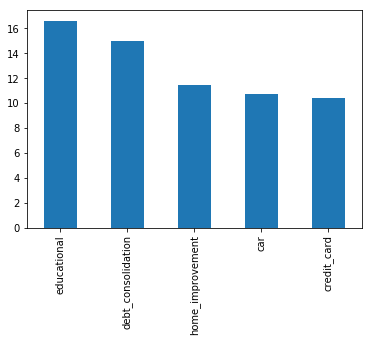

In [72]:
((loan[loan.IsDefault==1].purpose.value_counts()/loan.purpose.value_counts())*100)[:5].sort_values(ascending=False).round(2).plot.bar()
plt.show()

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35482 entries, 1 to 39680
Data columns (total 23 columns):
id                         35482 non-null int64
annual_inc                 35482 non-null float64
pub_rec                    35482 non-null int64
pub_rec_bankruptcies       35482 non-null float64
funded_amnt                35482 non-null int64
installment                35482 non-null float64
int_rate                   35482 non-null float32
term                       35482 non-null object
grade                      35482 non-null object
emp_title                  35482 non-null object
emp_length                 35482 non-null int64
home_ownership             35482 non-null object
verification_status        35482 non-null object
loan_status                35482 non-null object
purpose                    35482 non-null object
dti                        35482 non-null float64
total_pymnt                35482 non-null float64
total_rec_prncp            35482 non-null float64
recove

In [57]:
# Propation grades on default rate
((loan[loan.IsDefault==1].grade.value_counts()/loan.grade.value_counts())*100).round(2)

A     5.67
B    11.79
C    16.54
D    21.21
E    26.40
F    31.83
G    33.92
Name: grade, dtype: float64

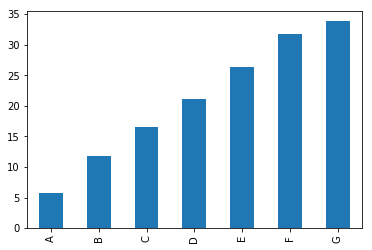

In [63]:
((loan[loan.IsDefault==1].grade.value_counts()/loan.grade.value_counts())*100).round(2).plot.bar()
plt.show()

In [59]:
# Propation of verified status on default rate
((loan[loan.IsDefault==1].verification_status.value_counts()/loan.verification_status.value_counts())*100).round(2)

Not Verified       12.13
Source Verified    14.56
Verified           16.45
Name: verification_status, dtype: float64

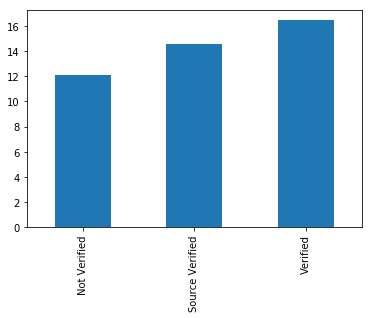

In [66]:
((loan[loan.IsDefault==1].verification_status.value_counts()/loan.verification_status.value_counts())*100).round(2).plot.bar()
plt.show()

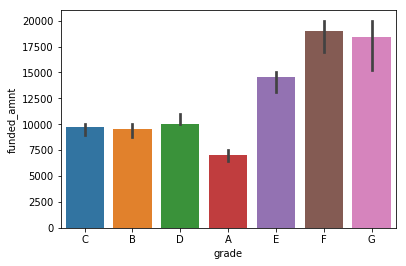

In [94]:
#Bar plot based on Defaulter and funded amount
import seaborn as sns
Defaulter = loan[loan.IsDefault==1]
sns.barplot(data=Defaulter,x="grade",y="funded_amnt" , estimator=np.median)
plt.show()

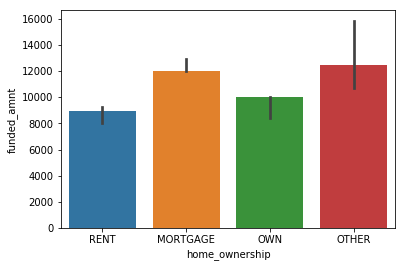

In [108]:
sns.barplot(data=Defaulter,x="home_ownership",y="funded_amnt" , estimator=np.median)
plt.show()

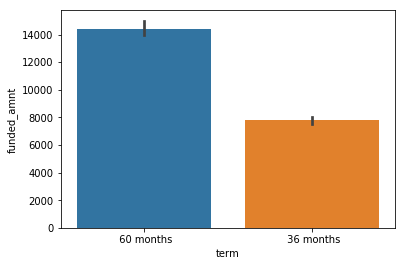

In [109]:
sns.barplot(data=Defaulter,x="term",y="funded_amnt" , estimator=np.median)
plt.show()

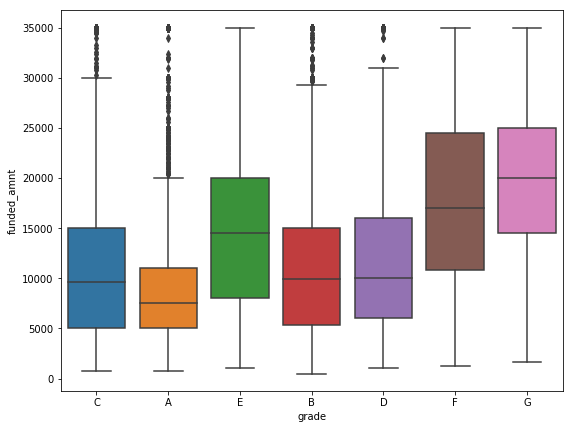

In [130]:
# Box plot to know highest loan taker
plt.figure(figsize=[9,7])
sns.boxplot(loan["grade"],loan.funded_amnt)
plt.show()

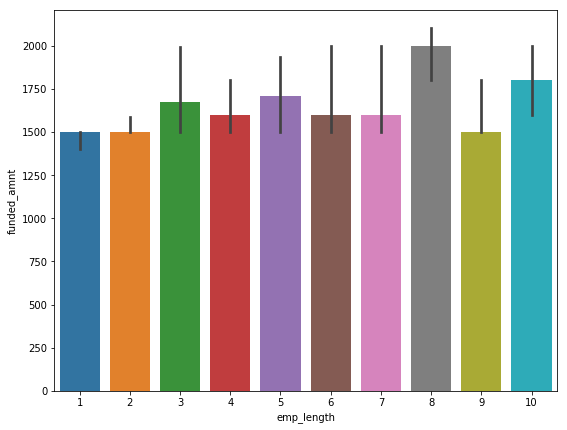

In [156]:
plt.figure(figsize=[9,7])
sns.barplot(loan["emp_length"],loan.funded_amnt,estimator=lambda x: np.quantile(x,0.02))
plt.show()